In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
data.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


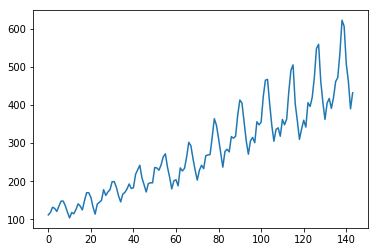

In [3]:
plt.plot(data)
plt.show()

In [4]:
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [5]:
# fix random seed for reproducibility
np.random.seed(7)

In [6]:
# load the dataset
dataframe = pd.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [7]:
# normalise the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [8]:
dataset

array([[ 0.01544401],
       [ 0.02702703],
       [ 0.05405405],
       [ 0.04826255],
       [ 0.03281853],
       [ 0.05984557],
       [ 0.08494207],
       [ 0.08494207],
       [ 0.06177607],
       [ 0.02895753],
       [ 0.        ],
       [ 0.02702703],
       [ 0.02123553],
       [ 0.04247104],
       [ 0.07142857],
       [ 0.05984557],
       [ 0.04054055],
       [ 0.08687258],
       [ 0.12741312],
       [ 0.12741312],
       [ 0.10424709],
       [ 0.05598456],
       [ 0.01930502],
       [ 0.06949806],
       [ 0.07915059],
       [ 0.08880308],
       [ 0.14285713],
       [ 0.11389962],
       [ 0.13127413],
       [ 0.14285713],
       [ 0.18339768],
       [ 0.18339768],
       [ 0.15444016],
       [ 0.11196911],
       [ 0.08108109],
       [ 0.1196911 ],
       [ 0.12934363],
       [ 0.14671814],
       [ 0.17181468],
       [ 0.14864865],
       [ 0.15250966],
       [ 0.22007722],
       [ 0.24324325],
       [ 0.26640925],
       [ 0.2027027 ],
       [ 0

In [9]:
# Split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [10]:
len(train), len(test)

(96, 48)

In [11]:
def create_dataset(dataset, look_back=1):
    dataX = []
    dataY = []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [12]:
print(create_dataset(dataset)[1])

[ 0.02702703  0.05405405  0.04826255  0.03281853  0.05984557  0.08494207
  0.08494207  0.06177607  0.02895753  0.          0.02702703  0.02123553
  0.04247104  0.07142857  0.05984557  0.04054055  0.08687258  0.12741312
  0.12741312  0.10424709  0.05598456  0.01930502  0.06949806  0.07915059
  0.08880308  0.14285713  0.11389962  0.13127413  0.14285713  0.18339768
  0.18339768  0.15444016  0.11196911  0.08108109  0.1196911   0.12934363
  0.14671814  0.17181468  0.14864865  0.15250966  0.22007722  0.24324325
  0.26640925  0.2027027   0.16795367  0.13127413  0.17374519  0.17760617
  0.17760617  0.25482625  0.25289574  0.24131274  0.26833975  0.3088803
  0.32432434  0.25675675  0.20656371  0.14671814  0.18725869  0.19305018
  0.16216215  0.25289574  0.23745173  0.25096524  0.3088803   0.38223937
  0.36486486  0.2992278   0.24131274  0.1911197   0.24131274  0.26640925
  0.24903473  0.31467178  0.31853279  0.32046333  0.40733591  0.50193048
  0.46911195  0.40154442  0.32818535  0.25675675  0.

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
trainX

array([[[ 0.01544401]],

       [[ 0.02702703]],

       [[ 0.05405405]],

       [[ 0.04826255]],

       [[ 0.03281853]],

       [[ 0.05984557]],

       [[ 0.08494207]],

       [[ 0.08494207]],

       [[ 0.06177607]],

       [[ 0.02895753]],

       [[ 0.        ]],

       [[ 0.02702703]],

       [[ 0.02123553]],

       [[ 0.04247104]],

       [[ 0.07142857]],

       [[ 0.05984557]],

       [[ 0.04054055]],

       [[ 0.08687258]],

       [[ 0.12741312]],

       [[ 0.12741312]],

       [[ 0.10424709]],

       [[ 0.05598456]],

       [[ 0.01930502]],

       [[ 0.06949806]],

       [[ 0.07915059]],

       [[ 0.08880308]],

       [[ 0.14285713]],

       [[ 0.11389962]],

       [[ 0.13127413]],

       [[ 0.14285713]],

       [[ 0.18339768]],

       [[ 0.18339768]],

       [[ 0.15444016]],

       [[ 0.11196911]],

       [[ 0.08108109]],

       [[ 0.1196911 ]],

       [[ 0.12934363]],

       [[ 0.14671814]],

       [[ 0.17181468]],

       [[ 0.14864865]],



In [16]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=1, verbose=2)

Epoch 1/500
1s - loss: 0.0413
Epoch 2/500
0s - loss: 0.0202
Epoch 3/500
0s - loss: 0.0146
Epoch 4/500
0s - loss: 0.0131
Epoch 5/500
0s - loss: 0.0121
Epoch 6/500
0s - loss: 0.0111
Epoch 7/500
0s - loss: 0.0102
Epoch 8/500
0s - loss: 0.0093
Epoch 9/500
0s - loss: 0.0081
Epoch 10/500
0s - loss: 0.0071
Epoch 11/500
0s - loss: 0.0062
Epoch 12/500
0s - loss: 0.0053
Epoch 13/500
0s - loss: 0.0045
Epoch 14/500
0s - loss: 0.0038
Epoch 15/500
0s - loss: 0.0033
Epoch 16/500
0s - loss: 0.0029
Epoch 17/500
0s - loss: 0.0026
Epoch 18/500
0s - loss: 0.0024
Epoch 19/500
0s - loss: 0.0022
Epoch 20/500
0s - loss: 0.0022
Epoch 21/500
0s - loss: 0.0021
Epoch 22/500
0s - loss: 0.0021
Epoch 23/500
0s - loss: 0.0021
Epoch 24/500
0s - loss: 0.0021
Epoch 25/500
0s - loss: 0.0020
Epoch 26/500
0s - loss: 0.0021
Epoch 27/500
0s - loss: 0.0020
Epoch 28/500
0s - loss: 0.0020
Epoch 29/500
0s - loss: 0.0020
Epoch 30/500
0s - loss: 0.0021
Epoch 31/500
0s - loss: 0.0020
Epoch 32/500
0s - loss: 0.0020
Epoch 33/500
0s -

0s - loss: 0.0020
Epoch 262/500
0s - loss: 0.0019
Epoch 263/500
0s - loss: 0.0020
Epoch 264/500
0s - loss: 0.0020
Epoch 265/500
0s - loss: 0.0020
Epoch 266/500
0s - loss: 0.0020
Epoch 267/500
0s - loss: 0.0019
Epoch 268/500
0s - loss: 0.0021
Epoch 269/500
0s - loss: 0.0020
Epoch 270/500
0s - loss: 0.0020
Epoch 271/500
0s - loss: 0.0019
Epoch 272/500
0s - loss: 0.0020
Epoch 273/500
0s - loss: 0.0020
Epoch 274/500
0s - loss: 0.0020
Epoch 275/500
0s - loss: 0.0020
Epoch 276/500
0s - loss: 0.0020
Epoch 277/500
0s - loss: 0.0020
Epoch 278/500
0s - loss: 0.0019
Epoch 279/500
0s - loss: 0.0020
Epoch 280/500
0s - loss: 0.0020
Epoch 281/500
0s - loss: 0.0019
Epoch 282/500
0s - loss: 0.0019
Epoch 283/500
0s - loss: 0.0020
Epoch 284/500
0s - loss: 0.0020
Epoch 285/500
0s - loss: 0.0019
Epoch 286/500
0s - loss: 0.0019
Epoch 287/500
0s - loss: 0.0020
Epoch 288/500
0s - loss: 0.0020
Epoch 289/500
0s - loss: 0.0020
Epoch 290/500
0s - loss: 0.0020
Epoch 291/500
0s - loss: 0.0019
Epoch 292/500
0s - los

In [17]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.58 RMSE
Test Score: 54.63 RMSE


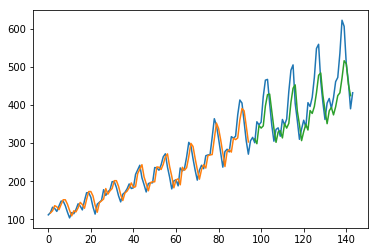

In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()